In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
kegg_pathway = pd.read_excel('KEGG_Pathway/KEGG_PathwayKO(brite).xlsx')
kegg_pathway = kegg_pathway.replace(np.nan, '')
pathwayname = kegg_pathway.columns[1:].tolist()

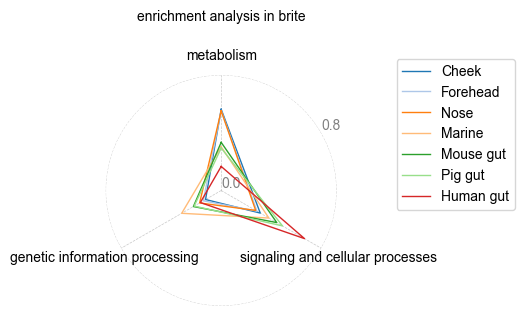

In [10]:
communities_namelist1 = ['Human_cheek', 'Human_forehead', 'Human_nose', 'Marine', 'Mouse', 'Pig','3_countries_combined']
communities_namelist2 = ['Human_cheek_BiDgenes', 'Human_forehead_BiDgenes', 'Human_nose_BiDgenes', 'Marine_BiDgenes', 'Mouse_BiDgenes', 'Pig_BiDgenes','3_countries_combined_BiDgenes']
communities_namelist3=['Cheek','Forehead','Nose','Marine','Mouse gut','Pig gut','Human gut']
matrix1 = np.zeros((len(communities_namelist2), len(pathwayname)))
for i in range(len(communities_namelist2)):
    all_bimodalgenes = pd.read_csv('bimodal genes/'+communities_namelist2[i],sep='\t').iloc[:,0].tolist()
    for j in range(len(pathwayname)):
        bimodalgenes_in_pathway = [gene for gene in kegg_pathway[pathwayname[j]] if gene in all_bimodalgenes]
        matrix1[i,j] = len(bimodalgenes_in_pathway)
sigmaPD1 = pd.DataFrame(matrix1,index=communities_namelist3,columns=pathwayname)
sigmaPD1.to_csv('fig/enrichment analysis in brite.csv')

#Plotting settings
fig = plt.figure(figsize=(3, 3))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
ax = fig.add_subplot(111, polar=True)
colors = plt.get_cmap('tab20').colors
# Data preparation
for i in range(len(communities_namelist3)):
    labels = ['metabolism','genetic information processing','signaling and cellular processes']
    scores = (sigmaPD1.iloc[i][0:3]/sum(sigmaPD1.iloc[i])).values.tolist()
    
    # Close the data (connect the first and last points to form a polygon)
    scores = np.concatenate((scores, [scores[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    # Calculate angles
    angles = np.linspace(0, 2*np.pi, len(labels)-1, endpoint=False).tolist()
    angles += angles[:1]  # Close the angles

    # Set the angle of the radar chart
    ax.set_theta_offset(np.pi / 2)
    

    # Draw the polygon
    ax.plot(angles, scores, color=colors[i], linewidth=1, linestyle='solid', label=communities_namelist3[i])

# Label and style optimization
ax.set_xticks(angles[:-1])  # Exclude the duplicate label at the closing point
ax.set_xticklabels(labels[:-1], fontsize=10)
ax.set_rlabel_position(-60)  # Offset angle for radial tick labels

# Hide all border lines
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.yticks([0, 0.8], color="grey", size=10)  # Radial tick marks
plt.ylim(0, 0.8)  # Fix the score range

# Title and grid beautification
plt.title("enrichment analysis in brite", fontsize=10, pad=20)
ax.grid(linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1.1))
plt.show()
fig.savefig('fig/enrichment analysis in brite.pdf',bbox_inches='tight')